Gaming industry is an interesting field to explore, it would be fun knowing who the most popular publishers and developers are and which games are the most popular, so let's analyze!

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import library

In [ ]:
import pandas as pd
import numpy as np

Reading dataset

In [ ]:
Game_Sales = pd.read_csv('/content/drive/MyDrive/RevoU/Games Sales - Case Study - Games.csv')
Game_Sales

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,12/1/2017,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,11/1/2011,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,5/1/2012,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,11/1/2006,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,5/1/2011,Action-adventure,Re-Logic,Re-Logic
...,...,...,...,...,...,...,...
172,Who Wants to Be a Millionaire?,1.0,NaN,11/1/1999,Trivia game,Jellyvision,Disney Interactive Studios
173,Wing Commander 3: Heart of the Tiger,1.0,Wing Commander,12/1/1994,Space combat simulation,Origin Systems,Electronic Arts
174,Zoo Tycoon,1.0,Zoo Tycoon,10/1/2001,Business simulation,Microsoft,Blue Fang Games
175,StarCraft II: Heart of the Swarm,1.0,StarCraft,3/1/2013,Real-time strategy,Blizzard Entertainment,Blizzard Entertainment


In [ ]:
Game_Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       177 non-null    object 
 1   Sales      177 non-null    float64
 2   Series     141 non-null    object 
 3   Release    177 non-null    object 
 4   Genre      177 non-null    object 
 5   Developer  177 non-null    object 
 6   Publisher  177 non-null    object 
dtypes: float64(1), object(6)
memory usage: 9.8+ KB


After checking, it was found that there were:
1. Null
2. Incorrect data type

## 1. Null

In [ ]:
Game_Sales.isna().sum()

Name          0
Sales         0
Series       36
Release       0
Genre         0
Developer     0
Publisher     0
dtype: int64

In [ ]:
Game_Sales[Game_Sales['Series'].isna()]

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,12/1/2017,Battle royale,PUBG Studios,Krafton
3,Garry's Mod,20.0,NaN,11/1/2006,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,5/1/2011,Action-adventure,Re-Logic,Re-Logic
10,Fall Guys,10.0,NaN,8/1/2020,Battle royale,Mediatonic,Devolver Digital
13,Rust,9.0,NaN,2/1/2018,Survival,Facepunch Studios,Facepunch Studios
20,Valheim,6.0,NaN,2/1/2021,Survival,Iron Gate,Coffee Stain Publishing
23,Cities: Skylines,5.0,NaN,3/1/2015,City-building,Colossal Order,Paradox Interactive
26,The Forest,5.0,NaN,4/1/2018,Survival,Endnight Games,Endnight Games
27,Cyberpunk 2077,4.5,NaN,12/1/2020,Action role-playing,CD Projekt Red,CD Projekt
28,DayZ,4.0,NaN,12/1/2013,Survival,Bohemia Interactive,Bohemia Interactive


In [ ]:
Game_Sales_without_null = Game_Sales[~Game_Sales['Series'].isna()]
Game_Sales_without_null

,Name,Sales,Series,Release,Genre,Developer,Publisher
1,Minecraft,33.0,Minecraft,11/1/2011,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,5/1/2012,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
5,World of Warcraft,14.0,Warcraft,11/1/2004,MMORPG,Blizzard Entertainment,Blizzard Entertainment
6,Half-Life 2,12.0,Half-Life,11/1/2004,First-person shooter,Valve,Valve (digital)
7,The Witcher 3: Wild Hunt,12.0,The Witcher,5/1/2015,Action role-playing,CD Projekt Red,CD Projekt
...,...,...,...,...,...,...,...
171,Warhammer Online: Age of Reckoning,1.0,Warhammer,9/1/2008,MMORPG,Mythic Entertainment,Electronic Arts
173,Wing Commander 3: Heart of the Tiger,1.0,Wing Commander,12/1/1994,Space combat simulation,Origin Systems,Electronic Arts
174,Zoo Tycoon,1.0,Zoo Tycoon,10/1/2001,Business simulation,Microsoft,Blue Fang Games
175,StarCraft II: Heart of the Swarm,1.0,StarCraft,3/1/2013,Real-time strategy,Blizzard Entertainment,Blizzard Entertainment


In [ ]:
Game_Sales_without_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 1 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       141 non-null    object 
 1   Sales      141 non-null    float64
 2   Series     141 non-null    object 
 3   Release    141 non-null    object 
 4   Genre      141 non-null    object 
 5   Developer  141 non-null    object 
 6   Publisher  141 non-null    object 
dtypes: float64(1), object(6)
memory usage: 8.8+ KB


In [ ]:
Game_Sales_without_null['Release']

1      11/1/2011
2       5/1/2012
5      11/1/2004
6      11/1/2004
7       5/1/2015
         ...    
171     9/1/2008
173    12/1/1994
174    10/1/2001
175     3/1/2013
176    11/1/2015
Name: Release, Length: 141, dtype: object

In [ ]:
Game_Sales_without_null['Release'] = pd.to_datetime(Game_Sales_without_null['Release'], format='%m/%d/%Y')
Game_Sales_without_null['Release']

<ipython-input-70-55e43616c8f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Game_Sales_without_null['Release'] = pd.to_datetime(Game_Sales_without_null['Release'], format='%m/%d/%Y')


1     2011-11-01
2     2012-05-01
5     2004-11-01
6     2004-11-01
7     2015-05-01
         ...    
171   2008-09-01
173   1994-12-01
174   2001-10-01
175   2013-03-01
176   2015-11-01
Name: Release, Length: 141, dtype: datetime64[ns]

In [ ]:
Game_Sales_without_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 1 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       141 non-null    object        
 1   Sales      141 non-null    float64       
 2   Series     141 non-null    object        
 3   Release    141 non-null    datetime64[ns]
 4   Genre      141 non-null    object        
 5   Developer  141 non-null    object        
 6   Publisher  141 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 8.8+ KB


Check for duplicate data

In [ ]:
duplicate = Game_Sales_without_null.duplicated()
duplicate.value_counts()

False    139
True       2
dtype: int64

There are 2 duplicate data, so delete

In [ ]:
Game_Sales_without_null = Game_Sales_without_null.drop_duplicates()
Game_Sales_without_null

,Name,Sales,Series,Release,Genre,Developer,Publisher
1,Minecraft,33.0,Minecraft,2011-11-01,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,2012-05-01,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
5,World of Warcraft,14.0,Warcraft,2004-11-01,MMORPG,Blizzard Entertainment,Blizzard Entertainment
6,Half-Life 2,12.0,Half-Life,2004-11-01,First-person shooter,Valve,Valve (digital)
7,The Witcher 3: Wild Hunt,12.0,The Witcher,2015-05-01,Action role-playing,CD Projekt Red,CD Projekt
...,...,...,...,...,...,...,...
169,Unreal Tournament,1.0,Unreal,1999-11-01,First-person shooter,Epic Games,GT Interactive
170,Vietcong,1.0,Vietcong,2003-03-01,Tactical shooter,Pterodon,Gathering of Developers
171,Warhammer Online: Age of Reckoning,1.0,Warhammer,2008-09-01,MMORPG,Mythic Entertainment,Electronic Arts
173,Wing Commander 3: Heart of the Tiger,1.0,Wing Commander,1994-12-01,Space combat simulation,Origin Systems,Electronic Arts


In [ ]:
Game_Sales_without_null.isnull().sum()

Name         0
Sales        0
Series       0
Release      0
Genre        0
Developer    0
Publisher    0
dtype: int64

<Axes: >

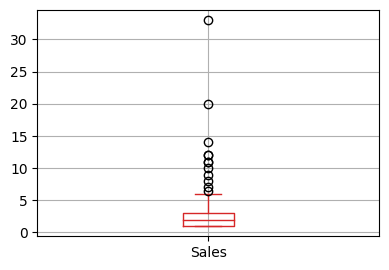

In [ ]:
import matplotlib.pyplot as plt #import library
#check outlier using box plot
fig = plt.figure(figsize=(15,10))
ax = plt.subplot2grid((3,3), (0,0))
Game_Sales_without_null['Sales'].plot(ax=ax, kind='box', grid=True, color='tab:red')

In [ ]:
Game_Sales_without_null['Sales'].describe()

count    139.000000
mean       2.831655
std        3.884399
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       33.000000
Name: Sales, dtype: float64

Convert dot (.) to comma (,) in value of 'Sales' for export to excel/sheet

In [ ]:
x = Game_Sales_without_null['Sales']
y = str(x)
z = y.replace("." , ",")
print(z)

1      1      1      33,0\n2      20,0\n5      14,0\n,,,
2      1      1      33,0\n2      20,0\n5      14,0\n,,,
5      1      1      33,0\n2      20,0\n5      14,0\n,,,
6      1      1      33,0\n2      20,0\n5      14,0\n,,,
7      1      1      33,0\n2      20,0\n5      14,0\n,,,
                             ,,,                        
169    1      1      33,0\n2      20,0\n5      14,0\n,,,
170    1      1      33,0\n2      20,0\n5      14,0\n,,,
171    1      1      33,0\n2      20,0\n5      14,0\n,,,
173    1      1      33,0\n2      20,0\n5      14,0\n,,,
174    1      1      33,0\n2      20,0\n5      14,0\n,,,
Name: Sales, Length: 139, dtype: object


In [ ]:
Game_Sales_without_null.to_csv('/content/drive/MyDrive/RevoU/Game_Sales_new.csv', index=False)